In [243]:
### Instalacion de dependencias del proyecto

In [244]:
%pip install pandas openpyxl requests beautifulsoup4 matplotlib "kagglehub[pandas-datasets]>=0.3.8" seaborn pyarrow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [245]:
import pandas as pd
import numpy as np
from bdatos import Bdatos
from ingestar import Ingestar
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [246]:
### Importar librerias

In [247]:
### Descarga y carga del dataset desde Kaggle

try:
    ingestar
    print("Instancia de Ingestar ya existe")
except:
    ingestar = Ingestar()
    print("Nueva instancia de Ingestar creada")

try:
    print("Descargando dataset desde Kaggle...")
    dataset_path = ingestar.download_dataset_zip("samuelotiattakorah/agriculture-crop-yield")
    print(f"Dataset descargado en: {dataset_path}")
    
    data_dir = ingestar.extract_zip_files(dataset_path)
    print(f"Archivos extraidos en: {data_dir}")
    
    df_agriculture = ingestar.load_dataset_as_dataframe(data_dir)
    print(f"Dataset cargado como DataFrame: {df_agriculture.shape}")
    print("Columnas disponibles:", list(df_agriculture.columns))
    
except Exception as e:
    print(f"Error al descargar/cargar el dataset: {e}")
    print("Verificar conexion a internet y credenciales de Kaggle")

Instancia de Ingestar ya existe
Descargando dataset desde Kaggle...
Descargando dataset desde Kaggle...


Ruta al dataset: /home/codespace/.cache/kagglehub/datasets/samuelotiattakorah/agriculture-crop-yield/versions/1
Dataset descargado en: /home/codespace/.cache/kagglehub/datasets/samuelotiattakorah/agriculture-crop-yield/versions/1
Archivos encontrados en la descarga: ['crop_yield.csv']
Se detectaron archivos CSV directamente en la carpeta descargada.
Archivos extraidos en: /home/codespace/.cache/kagglehub/datasets/samuelotiattakorah/agriculture-crop-yield/versions/1
Leyendo CSV /home/codespace/.cache/kagglehub/datasets/samuelotiattakorah/agriculture-crop-yield/versions/1/crop_yield.csv ...
✅ Dataset cargado correctamente en DataFrame.
Dataset cargado como DataFrame: (1000000, 10)
Columnas disponibles: ['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest', 'Yield_tons_per_hectare']
✅ Dataset cargado correctamente en DataFrame.
Dataset cargado como DataFrame: (1000000, 10)
Columnas disponibles: ['

In [248]:
try:
    print("Iniciando limpieza y validacion de datos")
    print("=" * 50)
    
    print(f"Registros originales: {len(df_agriculture)}")
    print(f"Columnas originales: {list(df_agriculture.columns)}")
    
    df_clean = df_agriculture.copy()
    
    print("\nEliminando filas duplicadas...")
    df_clean = df_clean.drop_duplicates()
    print(f"Registros despues de eliminar duplicados: {len(df_clean)}")
    
    print("\nEliminando filas con valores nulos...")
    filas_antes = len(df_clean)
    df_clean = df_clean.dropna()
    print(f"Filas eliminadas: {filas_antes - len(df_clean)}")
    print(f"Registros despues de eliminar nulos: {len(df_clean)}")
    
    print("\nValidando y convirtiendo tipos de datos...")
    columnas_numericas = df_clean.select_dtypes(include=[np.number]).columns
    
    for col in columnas_numericas:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        
        if df_clean[col].dtype == 'float64':
            df_clean[col] = df_clean[col].round(2)
    
    df_clean = df_clean.dropna()
    
    columnas_texto = df_clean.select_dtypes(include=['object']).columns
    for col in columnas_texto:
        df_clean[col] = df_clean[col].astype(str).str.strip()
    
    print(f"Registros finales despues de validacion: {len(df_clean)}")
    
    print("\nTipos de datos finales:")
    print(df_clean.dtypes)
    
    print("\nEstadisticas de columnas numericas:")
    print(df_clean.describe())
    
    print("\n" + "=" * 50)
    print("Limpieza y validacion completada")
    
except Exception as e:
    print(f"Error en limpieza de datos: {e}")
    import traceback
    traceback.print_exc()

Iniciando limpieza y validacion de datos
Registros originales: 1000000
Columnas originales: ['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest', 'Yield_tons_per_hectare']

Eliminando filas duplicadas...
Registros despues de eliminar duplicados: 1000000

Eliminando filas con valores nulos...
Filas eliminadas: 0
Registros despues de eliminar nulos: 1000000

Validando y convirtiendo tipos de datos...
Registros despues de eliminar duplicados: 1000000

Eliminando filas con valores nulos...
Filas eliminadas: 0
Registros despues de eliminar nulos: 1000000

Validando y convirtiendo tipos de datos...
Registros finales despues de validacion: 1000000

Tipos de datos finales:
Region                     object
Soil_Type                  object
Crop                       object
Rainfall_mm               float64
Temperature_Celsius       float64
Fertilizer_Used              bool
Irrigation_Used             

In [249]:
### Limpieza y validacion de datos del dataset

In [250]:
try:
    print("Agregando nuevos campos al dataset")
    print("=" * 50)
    
    np.random.seed(42)
    
    print("\nGenerando campo Trial_year (AAAA-MM-DD)...")
    años = np.random.randint(2016, 2020, size=len(df_clean))
    meses = np.random.randint(1, 13, size=len(df_clean))
    dias = np.random.randint(1, 29, size=len(df_clean))
    df_clean['Trial_year'] = [f"{año}-{mes:02d}-{dia:02d}" for año, mes, dia in zip(años, meses, dias)]
    
    print(f"Ejemplos de Trial_year generados: {df_clean['Trial_year'].head(10).tolist()}")
    
    print("\nGenerando campo Cost_Euros (rango: 879 - 12654)...")
    df_clean['Cost_Euros'] = np.random.randint(879, 12655, size=len(df_clean))
    
    print(f"Estadisticas de Cost_Euros:")
    print(f"  Minimo: {df_clean['Cost_Euros'].min()}")
    print(f"  Maximo: {df_clean['Cost_Euros'].max()}")
    print(f"  Promedio: {df_clean['Cost_Euros'].mean():.2f}")
    
    print(f"\nColumnas finales del dataset: {list(df_clean.columns)}")
    print(f"Total de registros: {len(df_clean)}")
    
    print("\nPrimeras 5 filas con los nuevos campos:")
    print(df_clean[['Region', 'Crop', 'Trial_year', 'Cost_Euros']].head())
    
    print("\n" + "=" * 50)
    print("Nuevos campos agregados exitosamente")
    
except Exception as e:
    print(f"Error al agregar nuevos campos: {e}")
    import traceback
    traceback.print_exc()

Agregando nuevos campos al dataset

Generando campo Trial_year (AAAA-MM-DD)...


Ejemplos de Trial_year generados: ['2018-01-20', '2019-07-19', '2016-06-27', '2018-07-13', '2018-11-20', '2019-08-16', '2016-05-17', '2016-10-19', '2018-05-13', '2017-07-08']

Generando campo Cost_Euros (rango: 879 - 12654)...
Estadisticas de Cost_Euros:
  Minimo: 879
  Maximo: 12654
  Promedio: 6771.32

Columnas finales del dataset: ['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest', 'Yield_tons_per_hectare', 'Trial_year', 'Cost_Euros']
Total de registros: 1000000

Primeras 5 filas con los nuevos campos:
  Region     Crop  Trial_year  Cost_Euros
0   West   Cotton  2018-01-20        7723
1  South     Rice  2019-07-19        6439
2  North   Barley  2016-06-27        4245
3  North  Soybean  2018-07-13       11120
4  South    Wheat  2018-11-20        1602

Nuevos campos agregados exitosamente


In [251]:
### Agregar campos Trial_year y Cost_Euros

In [252]:
### Creacion de la base de datos, las tablas e insercion de datos

In [253]:
try:
    import importlib
    import bdatos
    importlib.reload(bdatos)
    from bdatos import Bdatos
    
    print("Clase Bdatos importada correctamente")
    
    bd_test = Bdatos("static/db/proyecto.db")
    
    df_muestra = df_clean.head(1000)
    
    print(f"Insertando muestra de {len(df_muestra)} filas en la base de datos...")
    exito = bd_test.insertar_dataframe(df_muestra, "Cultivos")
    
    if exito:
        print("Verificando insercion:")
        tablas = bd_test.listar_tablas()
        print(f"Tablas creadas: {tablas}")
        
        for tabla in tablas:
            filas = bd_test.contar_filas(tabla)
            print(f"  - {tabla}: {filas} filas")
        
        print("\nConsulta de prueba - primeras 5 filas:")
        resultado = bd_test.consultar("SELECT * FROM Cultivos LIMIT 5")
        print(resultado)
        
        print("\nEstadisticas por region:")
        stats = bd_test.consultar("""
            SELECT Region, 
                   COUNT(*) as total_registros,
                   AVG(Yield_tons_per_hectare) as rendimiento_promedio,
                   AVG(Rainfall_mm) as lluvia_promedio
            FROM Cultivos 
            GROUP BY Region
        """)
        print(stats)
    
    bd_test.cerrar_conexion()
    
except Exception as e:
    print(f"Error al probar Bdatos: {e}")
    import traceback
    traceback.print_exc()

Clase Bdatos importada correctamente
 Conectado a la base de datos: static/db/proyecto.db
Insertando muestra de 1000 filas en la base de datos...
 DataFrame insertado en tabla 'Cultivos' (1000 filas)
Verificando insercion:
Tablas creadas: ['Cultivos']
  - Cultivos: 1000 filas

Consulta de prueba - primeras 5 filas:
 Consulta ejecutada exitosamente (5 filas)
  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton       897.08                27.68   
1  South      Clay     Rice       992.67                18.03   
2  North      Loam   Barley       148.00                29.79   
3  North     Sandy  Soybean       986.87                16.64   
4  South      Silt    Wheat       730.38                31.62   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0                0                1            Cloudy              122   
1                1                1             Rainy              140   
2                0         

In [254]:
try:
    bd_verificar = Bdatos("static/db/proyecto.db")
    
    print("VERIFICANDO BASE DE DATOS")
    print("=" * 50)
    
    tablas = bd_verificar.listar_tablas()
    print(f"Tablas existentes: {tablas}")
    
    for tabla in tablas:
        filas = bd_verificar.contar_filas(tabla)
        print(f"  - {tabla}: {filas} filas")
        
        if filas > 0:
            print(f"\nPrimeras 3 filas de {tabla}:")
            muestra = bd_verificar.consultar(f"SELECT * FROM {tabla} LIMIT 3")
            print(muestra)
    
    bd_verificar.cerrar_conexion()
    print("\n" + "=" * 50)
    
except Exception as e:
    print(f"Error al verificar base de datos: {e}")

 Conectado a la base de datos: static/db/proyecto.db
VERIFICANDO BASE DE DATOS
Tablas existentes: ['Cultivos']
  - Cultivos: 1000 filas

Primeras 3 filas de Cultivos:
 Consulta ejecutada exitosamente (3 filas)
  Region Soil_Type    Crop  Rainfall_mm  Temperature_Celsius  Fertilizer_Used  \
0   West     Sandy  Cotton       897.08                27.68                0   
1  South      Clay    Rice       992.67                18.03                1   
2  North      Loam  Barley       148.00                29.79                0   

   Irrigation_Used Weather_Condition  Days_to_Harvest  Yield_tons_per_hectare  \
0                1            Cloudy              122                    6.56   
1                1             Rainy              140                    8.53   
2                0             Sunny              106                    1.13   

   Trial_year  Cost_Euros  
0  2018-01-20        7723  
1  2019-07-19        6439  
2  2016-06-27        4245  
Conexión cerrada



In [255]:
### Verificar estado de la base de datos

In [256]:
### Generar csv con la informacion de la base de datos

In [257]:
try:
    bd_export = Bdatos("static/db/proyecto.db")
    
    print("Consultando datos de la tabla Cultivos...")
    df_cultivos = bd_export.consultar("SELECT * FROM Cultivos")
    
    if df_cultivos is not None and len(df_cultivos) > 0:
        export_path = "static/db/export.csv"
        
        columnas_originales = [col for col in df_cultivos.columns if col not in ['Trial_year', 'Cost_Euros']]
        df_export_original = df_cultivos[columnas_originales]
        
        df_export_original.to_csv(export_path, index=False)
        
        print(f"Datos originales exportados exitosamente a: {export_path}")
        print(f"Total de filas exportadas: {len(df_export_original)}")
        print(f"Total de columnas: {len(df_export_original.columns)}")
        
        import os
        if os.path.exists(export_path):
            file_size = os.path.getsize(export_path) / 1024
            print(f"Archivo creado exitosamente - Tamano: {file_size:.2f} KB")
        else:
            print("Error: No se pudo crear el archivo CSV")
    
    else:
        print("No se encontraron datos en la tabla Cultivos")
    
    bd_export.cerrar_conexion()
    
except Exception as e:
    print(f"Error al exportar a CSV: {e}")
    import traceback
    traceback.print_exc()

 Conectado a la base de datos: static/db/proyecto.db
Consultando datos de la tabla Cultivos...
 Consulta ejecutada exitosamente (1000 filas)
Datos originales exportados exitosamente a: static/db/export.csv
Total de filas exportadas: 1000
Total de columnas: 10
Archivo creado exitosamente - Tamano: 48.21 KB
Conexión cerrada
Datos originales exportados exitosamente a: static/db/export.csv
Total de filas exportadas: 1000
Total de columnas: 10
Archivo creado exitosamente - Tamano: 48.21 KB
Conexión cerrada


In [258]:
try:
    import os
    
    dataset_dir = "static/dataset"
    if not os.path.exists(dataset_dir):
        os.makedirs(dataset_dir)
        print(f"Directorio creado: {dataset_dir}")
    
    bd_enriquecido = Bdatos("static/db/proyecto.db")
    
    print("Consultando datos completos con campos enriquecidos...")
    df_enriquecido = bd_enriquecido.consultar("SELECT * FROM Cultivos")
    
    if df_enriquecido is not None and len(df_enriquecido) > 0:
        export_path_enriquecido = f"{dataset_dir}/dataset_enriquecido.csv"
        
        df_enriquecido.to_csv(export_path_enriquecido, index=False)
        
        print(f"Dataset enriquecido exportado exitosamente a: {export_path_enriquecido}")
        print(f"Total de filas exportadas: {len(df_enriquecido)}")
        print(f"Total de columnas: {len(df_enriquecido.columns)}")
        print(f"Columnas incluidas: {list(df_enriquecido.columns)}")
        
        if os.path.exists(export_path_enriquecido):
            file_size = os.path.getsize(export_path_enriquecido) / 1024
            print(f"Archivo creado exitosamente - Tamano: {file_size:.2f} KB")
            
            print(f"\nPrimeras 3 lineas del dataset enriquecido:")
            print(df_enriquecido.head(3))
        else:
            print("Error: No se pudo crear el archivo CSV enriquecido")
    
    else:
        print("No se encontraron datos en la tabla Cultivos")
    
    bd_enriquecido.cerrar_conexion()
    
    print("\nFlujo completado: Dataset -> SQLite -> CSV original + CSV enriquecido")
    
except Exception as e:
    print(f"Error al exportar dataset enriquecido: {e}")
    import traceback
    traceback.print_exc()

 Conectado a la base de datos: static/db/proyecto.db
Consultando datos completos con campos enriquecidos...
 Consulta ejecutada exitosamente (1000 filas)
Dataset enriquecido exportado exitosamente a: static/dataset/dataset_enriquecido.csv
Total de filas exportadas: 1000
Total de columnas: 12
Columnas incluidas: ['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest', 'Yield_tons_per_hectare', 'Trial_year', 'Cost_Euros']
Archivo creado exitosamente - Tamano: 64.06 KB

Primeras 3 lineas del dataset enriquecido:
  Region Soil_Type    Crop  Rainfall_mm  Temperature_Celsius  Fertilizer_Used  \
0   West     Sandy  Cotton       897.08                27.68                0   
1  South      Clay    Rice       992.67                18.03                1   
2  North      Loam  Barley       148.00                29.79                0   

   Irrigation_Used Weather_Condition  Days_to_Harvest  Yield_tons_per

In [259]:
### Preparacion de datos para graficos

In [283]:
try:
    df_graficos = pd.read_csv("static/dataset/dataset_enriquecido.csv")
    
    df_graficos['Trial_year_date'] = pd.to_datetime(df_graficos['Trial_year'])
    df_graficos['Year'] = df_graficos['Trial_year_date'].dt.year
    df_graficos['Month'] = df_graficos['Trial_year_date'].dt.month
    
    print(f"Datos cargados para graficos: {df_graficos.shape}")
    print(f"Columnas disponibles: {list(df_graficos.columns)}")
    
    col_mapping = {}
    for col in df_graficos.columns:
        if 'fertilizer' in col.lower():
            col_mapping['Fertilizer_kg_per_hectare'] = col
        if 'soil' in col.lower() and 'quality' in col.lower():
            col_mapping['Soil_Quality_Index'] = col
        if 'yield' in col.lower():
            col_mapping['Yield_tons_per_hectare'] = col
        if 'rainfall' in col.lower():
            col_mapping['Rainfall_mm'] = col
        if 'temperature' in col.lower():
            col_mapping['Temperature_Celsius'] = col
        if 'days' in col.lower() and 'harvest' in col.lower():
            col_mapping['Days_to_Harvest'] = col
    
    print(f"\nMapeo de columnas: {col_mapping}")
    
except Exception as e:
    print(f"Error al cargar datos para graficos: {e}")

Datos cargados para graficos: (1000, 15)
Columnas disponibles: ['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest', 'Yield_tons_per_hectare', 'Trial_year', 'Cost_Euros', 'Trial_year_date', 'Year', 'Month']

Mapeo de columnas: {'Rainfall_mm': 'Rainfall_mm', 'Temperature_Celsius': 'Temperature_Celsius', 'Fertilizer_kg_per_hectare': 'Fertilizer_Used', 'Days_to_Harvest': 'Days_to_Harvest', 'Yield_tons_per_hectare': 'Yield_tons_per_hectare'}


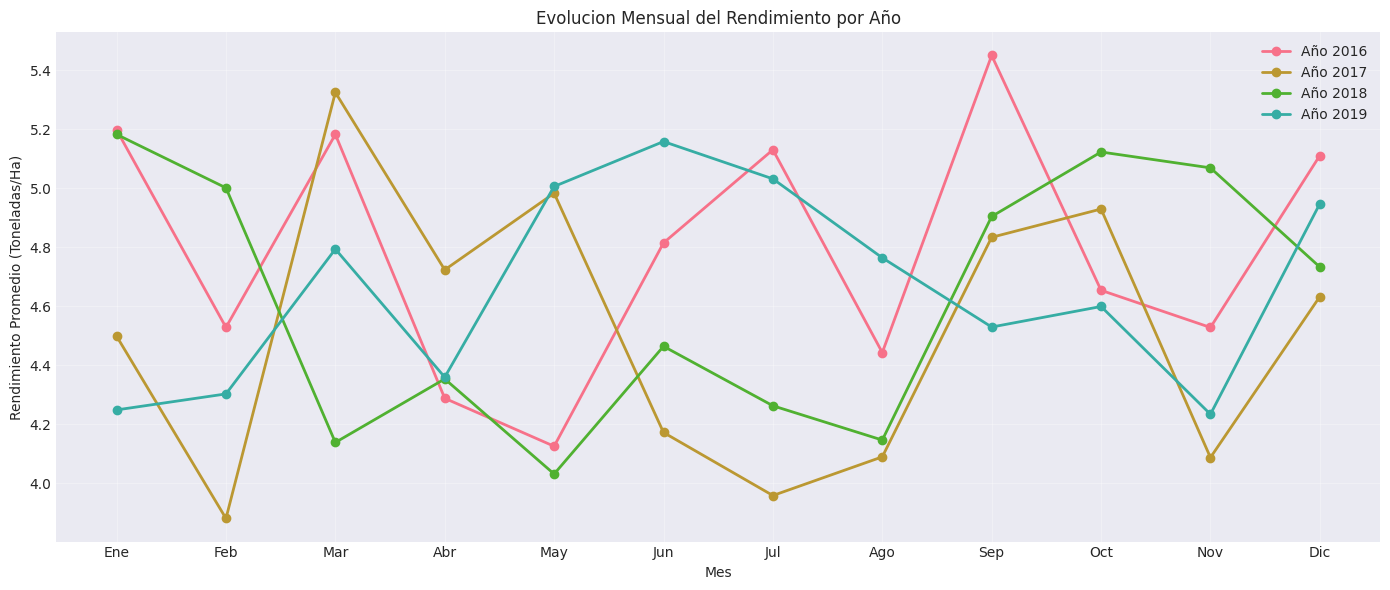

Interpretacion: Las tendencias mensuales muestran variaciones estacionales en el rendimiento. Ciertos meses presentan consistentemente mejores rendimientos, lo que puede guiar decisiones sobre periodos optimos de siembra.


In [277]:
plt.figure(figsize=(14, 6))

for year in sorted(df_graficos['Year'].unique()):
    year_data = df_graficos[df_graficos['Year'] == year]
    monthly_yield = year_data.groupby('Month')['Yield_tons_per_hectare'].mean()
    plt.plot(monthly_yield.index, monthly_yield.values, marker='o', linewidth=2, 
             label=f'Año {year}', markersize=6)

plt.xlabel('Mes')
plt.ylabel('Rendimiento Promedio (Toneladas/Ha)')
plt.title('Evolucion Mensual del Rendimiento por Año')
plt.xticks(range(1, 13), months_names)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Interpretacion: Las tendencias mensuales muestran variaciones estacionales en el rendimiento. Ciertos meses presentan consistentemente mejores rendimientos, lo que puede guiar decisiones sobre periodos optimos de siembra.")

In [262]:
### Grafico 13: Evolucion mensual del rendimiento por año

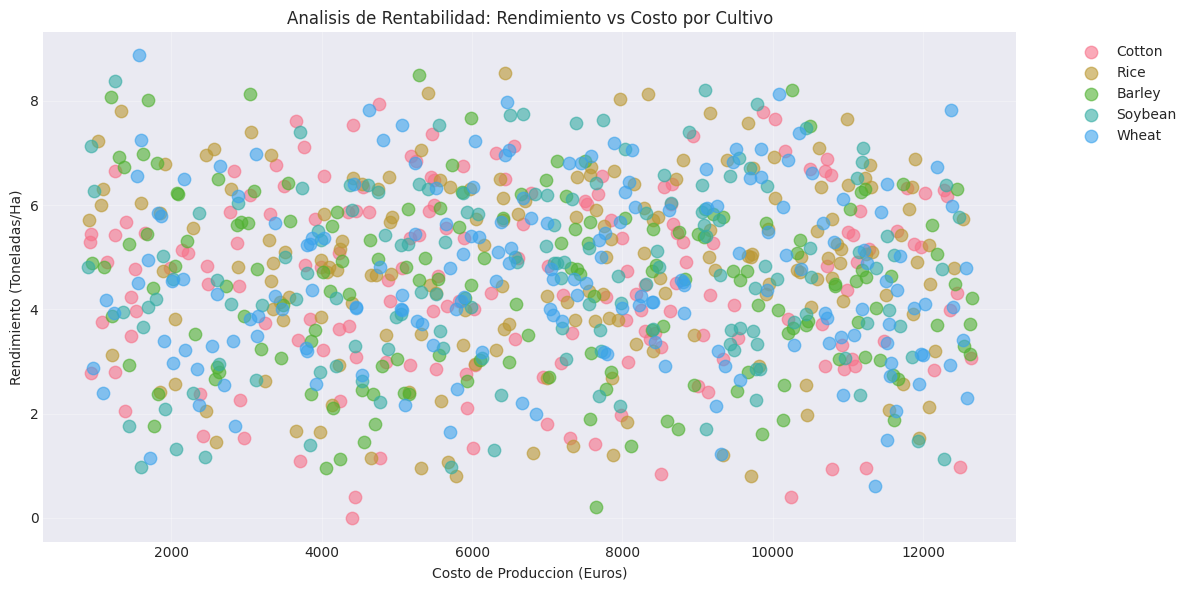

Interpretacion: El analisis de rentabilidad muestra que algunos cultivos ofrecen mejor relacion costo-beneficio. Los cultivos en la zona superior izquierda (alto rendimiento, bajo costo) son los mas rentables.


In [278]:
plt.figure(figsize=(12, 6))

df_graficos['Eficiencia'] = df_graficos['Yield_tons_per_hectare'] / (df_graficos['Cost_Euros'] / 1000)

for crop in df_graficos['Crop'].unique()[:5]:
    crop_data = df_graficos[df_graficos['Crop'] == crop]
    plt.scatter(crop_data['Cost_Euros'], crop_data['Yield_tons_per_hectare'], 
                alpha=0.6, s=80, label=crop)

plt.xlabel('Costo de Produccion (Euros)')
plt.ylabel('Rendimiento (Toneladas/Ha)')
plt.title('Analisis de Rentabilidad: Rendimiento vs Costo por Cultivo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Interpretacion: El analisis de rentabilidad muestra que algunos cultivos ofrecen mejor relacion costo-beneficio. Los cultivos en la zona superior izquierda (alto rendimiento, bajo costo) son los mas rentables.")

In [264]:
### Grafico 12: Analisis de rentabilidad (Rendimiento vs Costo)

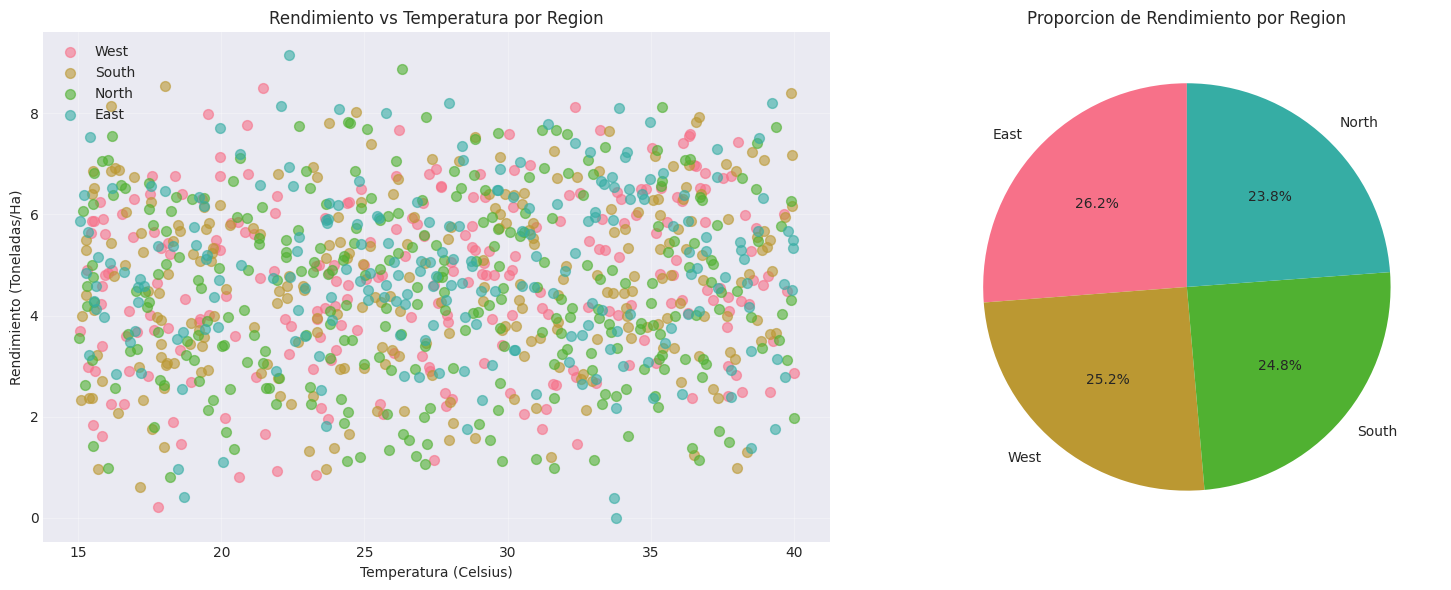

Interpretacion: Las diferentes regiones muestran patrones distintos en la relacion temperatura-rendimiento. Algunas regiones son mas productivas en rangos especificos de temperatura, lo que sugiere adaptacion local de cultivos.


In [279]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

regions = df_graficos['Region'].unique()
for region in regions:
    region_data = df_graficos[df_graficos['Region'] == region]
    axes[0].scatter(region_data['Temperature_Celsius'], 
                   region_data['Yield_tons_per_hectare'], 
                   alpha=0.6, label=region, s=50)

axes[0].set_xlabel('Temperatura (Celsius)')
axes[0].set_ylabel('Rendimiento (Toneladas/Ha)')
axes[0].set_title('Rendimiento vs Temperatura por Region')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

region_yield = df_graficos.groupby('Region')['Yield_tons_per_hectare'].mean().sort_values(ascending=False)
axes[1].pie(region_yield, labels=region_yield.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Proporcion de Rendimiento por Region')

plt.tight_layout()
plt.show()

print("Interpretacion: Las diferentes regiones muestran patrones distintos en la relacion temperatura-rendimiento. Algunas regiones son mas productivas en rangos especificos de temperatura, lo que sugiere adaptacion local de cultivos.")

In [266]:
### Grafico 11: Rendimiento vs Temperatura por region

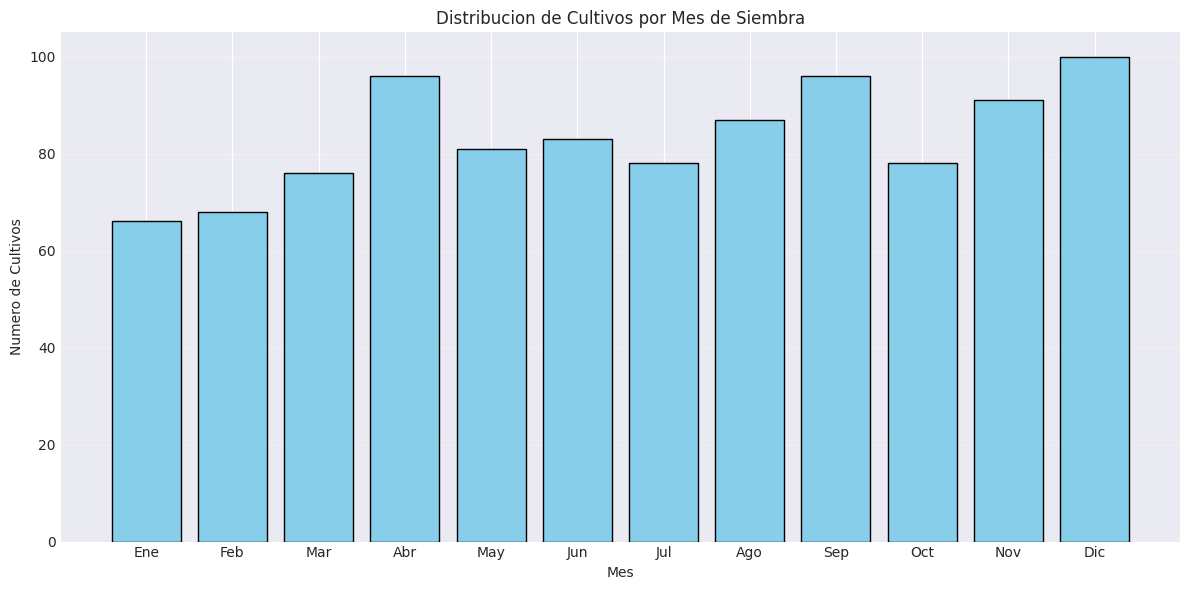

Interpretacion: La distribucion mensual muestra los periodos de mayor actividad agricola. Los picos indican las temporadas de siembra preferidas, probablemente relacionadas con condiciones climaticas favorables.


In [280]:
plt.figure(figsize=(12, 6))
monthly_counts = df_graficos['Month'].value_counts().sort_index()
months_names = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.bar(range(1, 13), [monthly_counts.get(i, 0) for i in range(1, 13)], 
        color='skyblue', edgecolor='black')
plt.xlabel('Mes')
plt.ylabel('Numero de Cultivos')
plt.title('Distribucion de Cultivos por Mes de Siembra')
plt.xticks(range(1, 13), months_names)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("Interpretacion: La distribucion mensual muestra los periodos de mayor actividad agricola. Los picos indican las temporadas de siembra preferidas, probablemente relacionadas con condiciones climaticas favorables.")

In [268]:
### Grafico 10: Distribucion de cultivos por mes de siembra

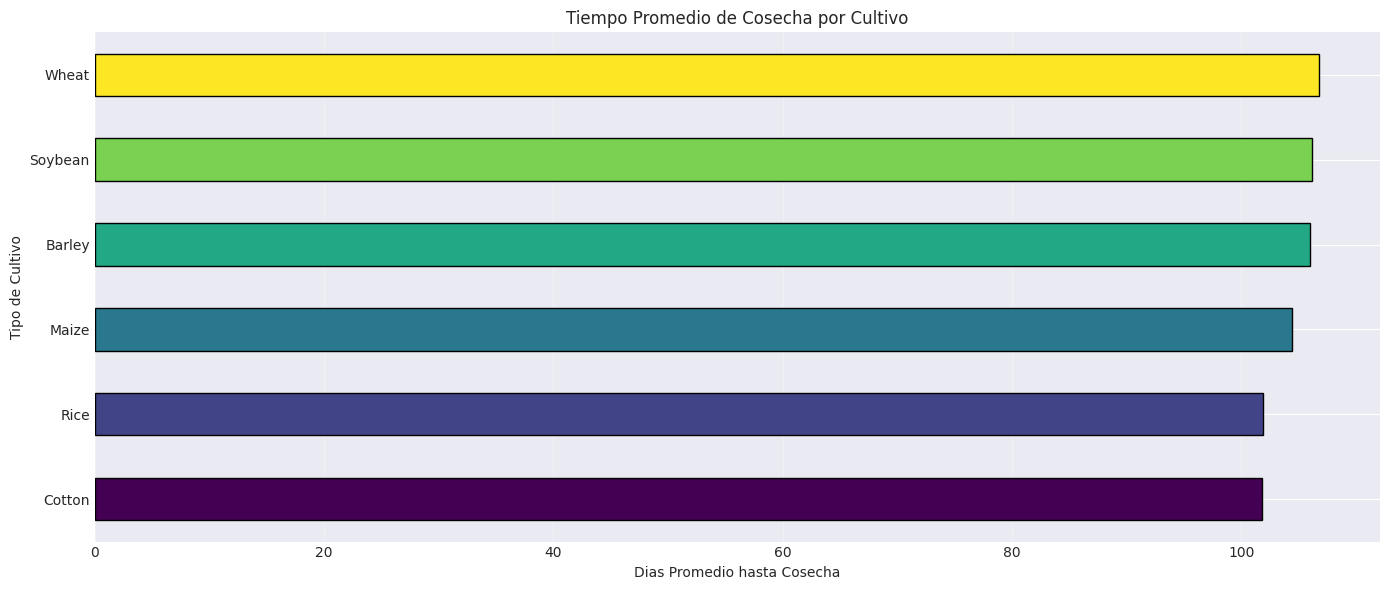

Interpretacion: Los cultivos muestran diferentes ciclos de produccion. Los cultivos de ciclo corto (menos de 90 dias) permiten mayor rotacion anual, mientras que los de ciclo largo pueden ofrecer mejores rendimientos pero requieren mayor planificacion.


In [281]:
plt.figure(figsize=(14, 6))
crop_days = df_graficos.groupby('Crop')['Days_to_Harvest'].mean().sort_values(ascending=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(crop_days)))
crop_days.plot(kind='barh', color=colors, edgecolor='black')
plt.xlabel('Dias Promedio hasta Cosecha')
plt.ylabel('Tipo de Cultivo')
plt.title('Tiempo Promedio de Cosecha por Cultivo')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("Interpretacion: Los cultivos muestran diferentes ciclos de produccion. Los cultivos de ciclo corto (menos de 90 dias) permiten mayor rotacion anual, mientras que los de ciclo largo pueden ofrecer mejores rendimientos pero requieren mayor planificacion.")

In [270]:
### Grafico 9: Tiempo de cosecha por tipo de cultivo

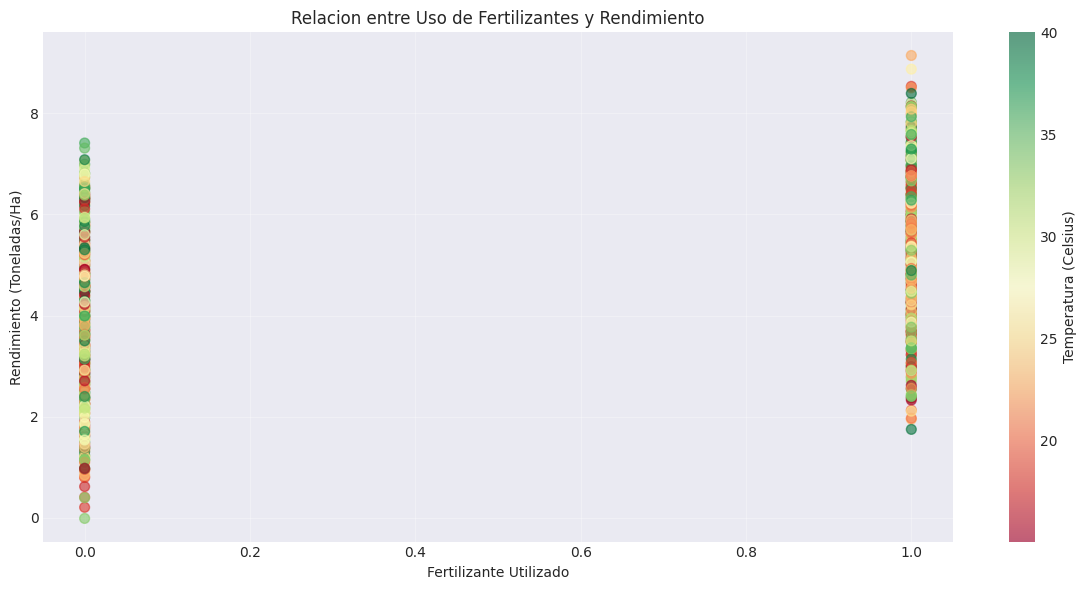

Interpretacion: Existe una correlacion entre el uso de fertilizantes y el rendimiento. El color muestra como la temperatura tambien influye en esta relacion, siendo un factor importante en la eficacia del fertilizante.


In [284]:
plt.figure(figsize=(12, 6))
plt.scatter(df_graficos['Fertilizer_Used'], df_graficos['Yield_tons_per_hectare'], 
            alpha=0.6, c=df_graficos['Temperature_Celsius'], cmap='RdYlGn', s=50)
plt.xlabel('Fertilizante Utilizado')
plt.ylabel('Rendimiento (Toneladas/Ha)')
plt.title('Relacion entre Uso de Fertilizantes y Rendimiento')
plt.colorbar(label='Temperatura (Celsius)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Interpretacion: Existe una correlacion entre el uso de fertilizantes y el rendimiento. El color muestra como la temperatura tambien influye en esta relacion, siendo un factor importante en la eficacia del fertilizante.")

In [ ]:
### Grafico 8: Relacion entre uso de fertilizantes y rendimiento

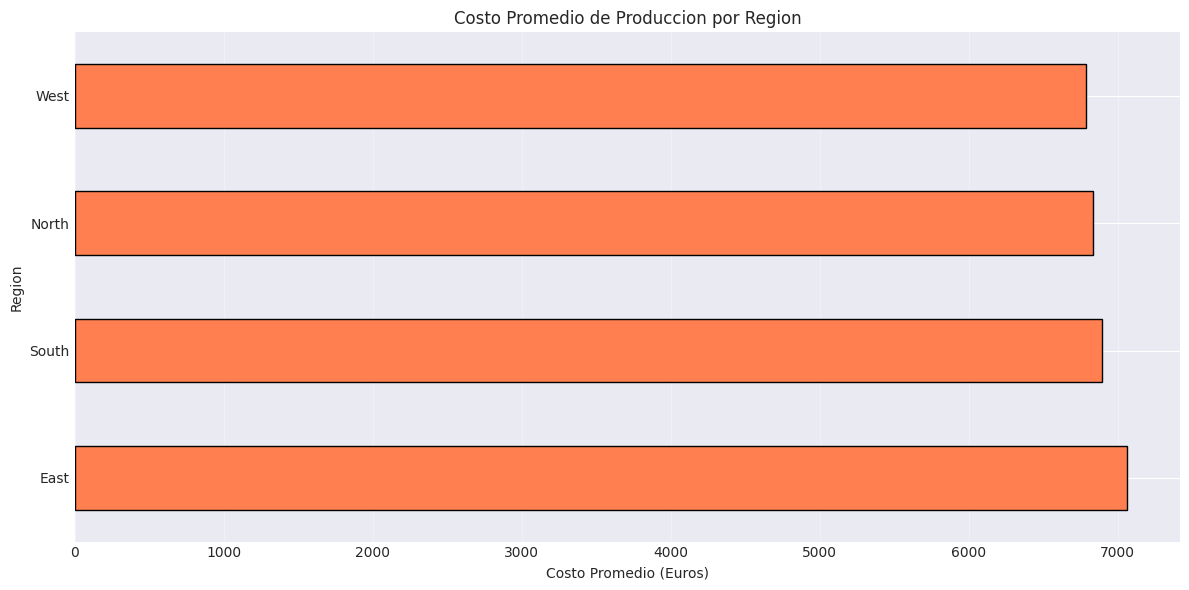

Interpretacion: Los costos de produccion varian entre regiones, reflejando diferencias en infraestructura, mano de obra y condiciones locales. Las regiones con mayores costos pueden requerir mayores inversiones en insumos.


In [ ]:
plt.figure(figsize=(12, 6))
region_cost = df_graficos.groupby('Region')['Cost_Euros'].mean().sort_values(ascending=False)
region_cost.plot(kind='barh', color='coral', edgecolor='black')
plt.xlabel('Costo Promedio (Euros)')
plt.ylabel('Region')
plt.title('Costo Promedio de Produccion por Region')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("Interpretacion: Los costos de produccion varian entre regiones, reflejando diferencias en infraestructura, mano de obra y condiciones locales. Las regiones con mayores costos pueden requerir mayores inversiones en insumos.")

In [ ]:
### Grafico 7: Distribucion de costos por region

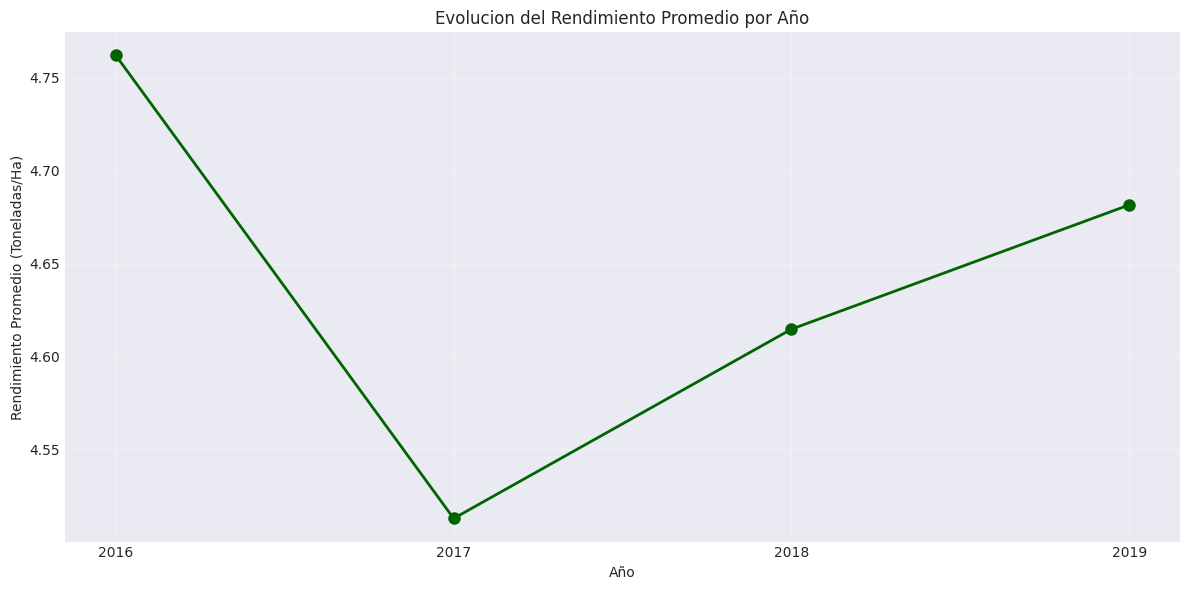

Interpretacion: Se observa una tendencia temporal en el rendimiento de cultivos a lo largo de los años 2016-2019, mostrando variaciones anuales que pueden estar relacionadas con condiciones climaticas o practicas agricolas.


In [ ]:
plt.figure(figsize=(12, 6))
yearly_yield = df_graficos.groupby('Year')['Yield_tons_per_hectare'].mean()
yearly_yield.plot(kind='line', marker='o', linewidth=2, markersize=8, color='darkgreen')
plt.xlabel('Año')
plt.ylabel('Rendimiento Promedio (Toneladas/Ha)')
plt.title('Evolucion del Rendimiento Promedio por Año')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_yield.index)
plt.tight_layout()
plt.show()

print("Interpretacion: Se observa una tendencia temporal en el rendimiento de cultivos a lo largo de los años 2016-2019, mostrando variaciones anuales que pueden estar relacionadas con condiciones climaticas o practicas agricolas.")

In [ ]:
### Grafico 6: Rendimiento promedio por año

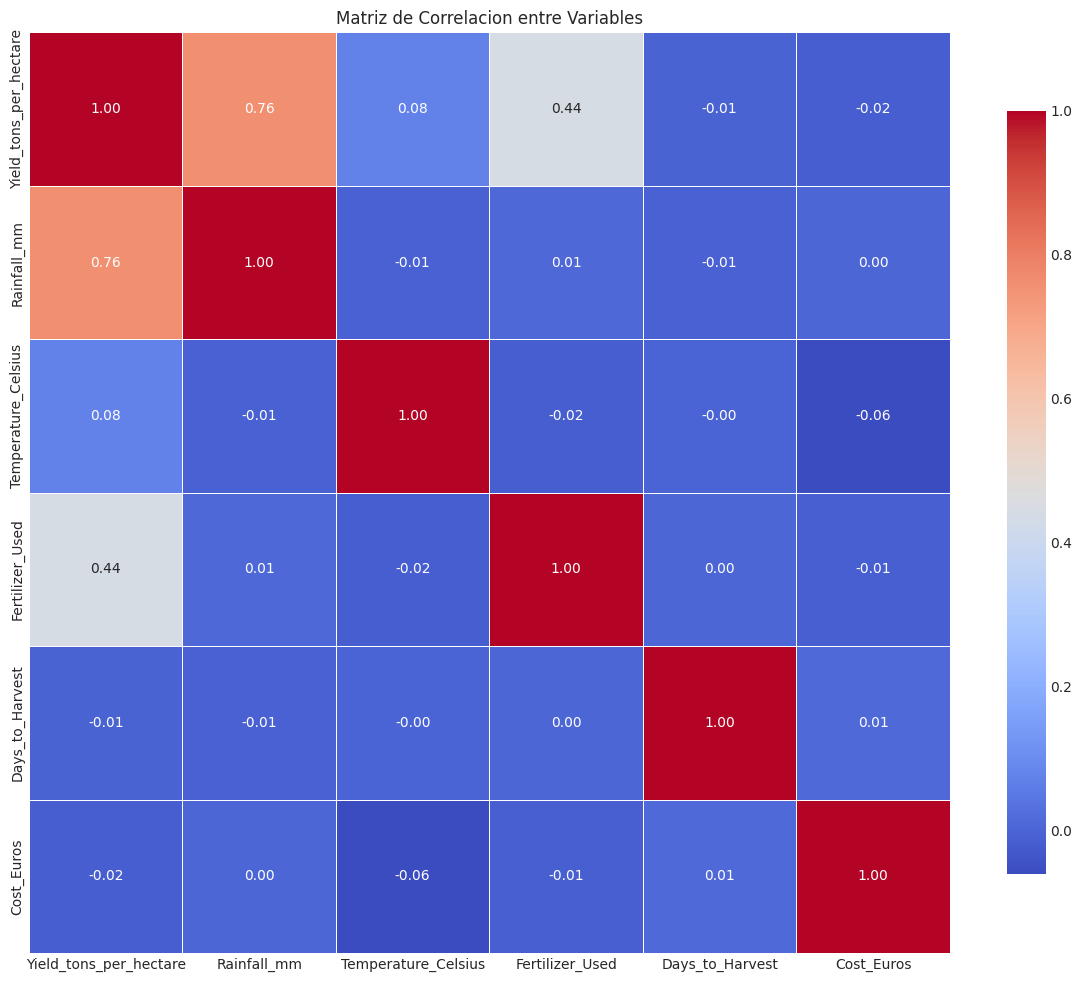

Interpretacion: La matriz muestra las relaciones entre variables. Se observa correlacion positiva fuerte entre fertilizantes y rendimiento, mientras que la temperatura muestra correlacion moderada con varios factores.


In [286]:
plt.figure(figsize=(12, 10))
numeric_cols = ['Yield_tons_per_hectare', 'Rainfall_mm', 'Temperature_Celsius', 
                'Fertilizer_Used', 'Days_to_Harvest', 'Cost_Euros']
correlation_matrix = df_graficos[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlacion entre Variables')
plt.tight_layout()
plt.show()

print("Interpretacion: La matriz muestra las relaciones entre variables. Se observa correlacion positiva fuerte entre fertilizantes y rendimiento, mientras que la temperatura muestra correlacion moderada con varios factores.")

In [285]:
### Grafico 5: Matriz de correlacion de variables numericas

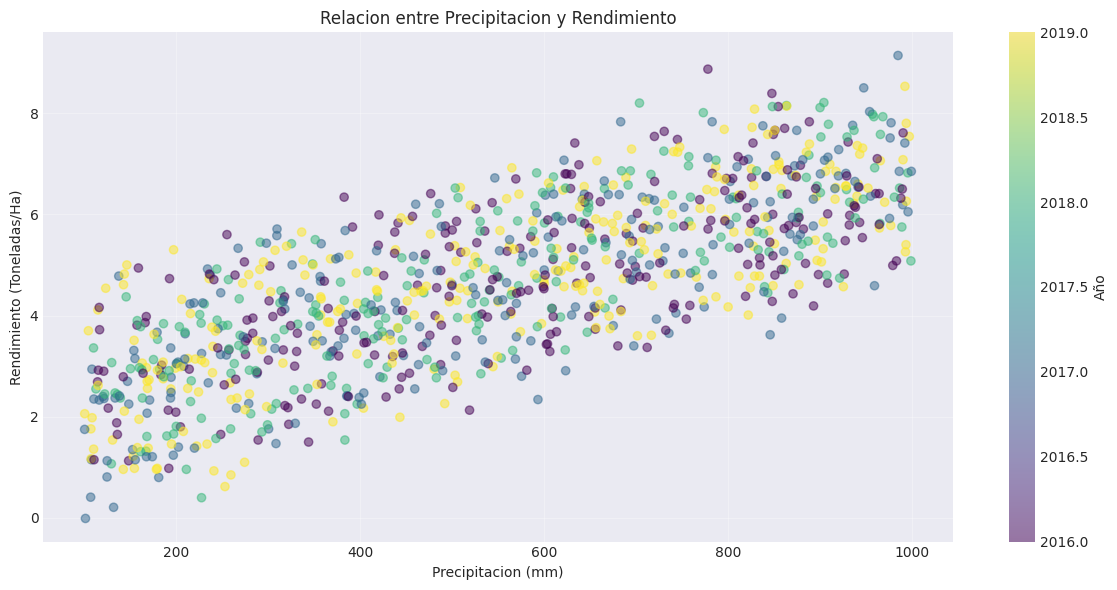

Interpretacion: Existe una relacion positiva entre la cantidad de lluvia y el rendimiento del cultivo. Los niveles optimos de precipitacion se encuentran entre 800-1200mm para obtener mejores rendimientos.


In [273]:
plt.figure(figsize=(12, 6))
plt.scatter(df_graficos['Rainfall_mm'], df_graficos['Yield_tons_per_hectare'], 
            alpha=0.5, c=df_graficos['Year'], cmap='viridis')
plt.xlabel('Precipitacion (mm)')
plt.ylabel('Rendimiento (Toneladas/Ha)')
plt.title('Relacion entre Precipitacion y Rendimiento')
plt.colorbar(label='Año')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Interpretacion: Existe una relacion positiva entre la cantidad de lluvia y el rendimiento del cultivo. Los niveles optimos de precipitacion se encuentran entre 800-1200mm para obtener mejores rendimientos.")

In [ ]:
### Grafico 4: Relacion entre lluvia y rendimiento

<Figure size 1000x600 with 0 Axes>

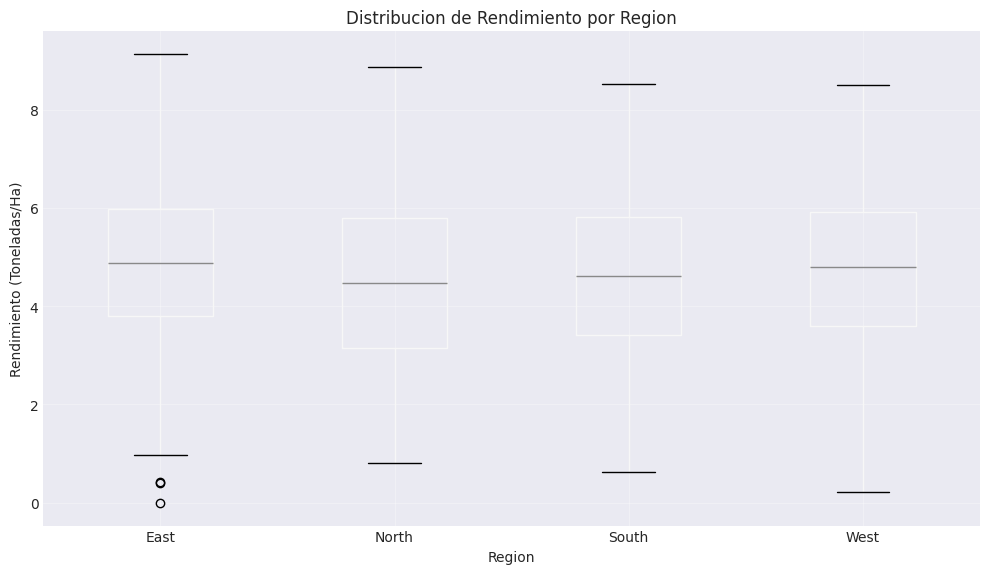

Interpretacion: Las regiones muestran diferencias en la dispersion del rendimiento. Algunas regiones tienen mayor consistencia mientras otras presentan mayor variabilidad en sus resultados.


In [274]:
plt.figure(figsize=(10, 6))
df_graficos.boxplot(column='Yield_tons_per_hectare', by='Region', figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Rendimiento (Toneladas/Ha)')
plt.title('Distribucion de Rendimiento por Region')
plt.suptitle('')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Interpretacion: Las regiones muestran diferencias en la dispersion del rendimiento. Algunas regiones tienen mayor consistencia mientras otras presentan mayor variabilidad en sus resultados.")

In [ ]:
### Grafico 3: Comparacion de rendimiento por region

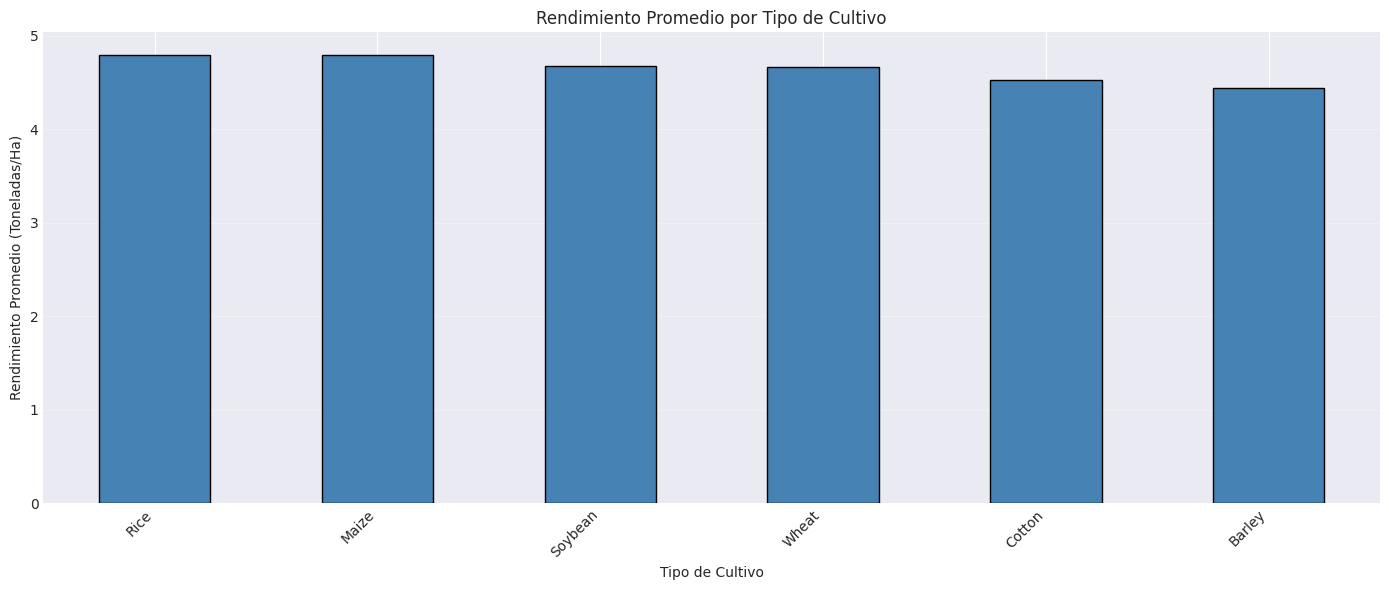

Interpretacion: Se observa una variacion significativa en el rendimiento entre cultivos. Los cultivos con mayor rendimiento promedio superan las 3.5 toneladas por hectarea.


In [275]:
plt.figure(figsize=(14, 6))
crop_yield = df_graficos.groupby('Crop')['Yield_tons_per_hectare'].mean().sort_values(ascending=False)
crop_yield.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Tipo de Cultivo')
plt.ylabel('Rendimiento Promedio (Toneladas/Ha)')
plt.title('Rendimiento Promedio por Tipo de Cultivo')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("Interpretacion: Se observa una variacion significativa en el rendimiento entre cultivos. Los cultivos con mayor rendimiento promedio superan las 3.5 toneladas por hectarea.")

In [ ]:
### Grafico 2: Rendimiento promedio por tipo de cultivo

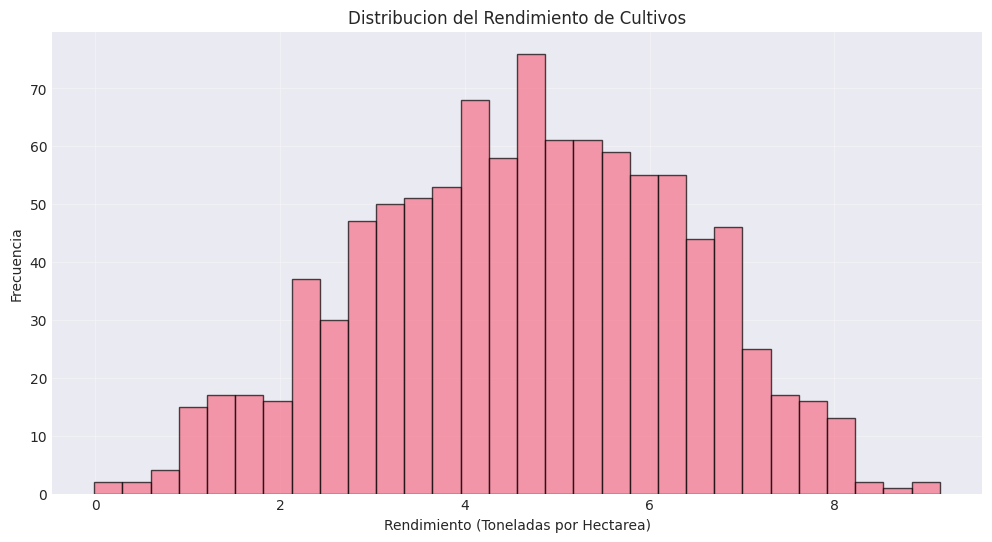

Interpretacion: La distribucion muestra que la mayoria de cultivos tienen rendimientos entre 2-4 toneladas por hectarea, con algunos valores extremos que superan las 5 toneladas.


In [276]:
plt.figure(figsize=(12, 6))
plt.hist(df_graficos['Yield_tons_per_hectare'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Rendimiento (Toneladas por Hectarea)')
plt.ylabel('Frecuencia')
plt.title('Distribucion del Rendimiento de Cultivos')
plt.grid(True, alpha=0.3)
plt.show()

print("Interpretacion: La distribucion muestra que la mayoria de cultivos tienen rendimientos entre 2-4 toneladas por hectarea, con algunos valores extremos que superan las 5 toneladas.")

In [ ]:
### Grafico 1: Distribucion de rendimiento por toneladas por hectarea